In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_eb86c801286f42f5bad0fcbf166110d1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='nCv-n4olQ_JWkKOBdMphSj91vYGHe8xdchgrnX6pyESO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_eb86c801286f42f5bad0fcbf166110d1.get_object(Bucket='lifeexpectancy-donotdelete-pr-f0otqcvthtb4c3',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Checking Missing Values

In [6]:
df.isna().sum() 

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
df['Status']=pd.get_dummies(df['Status'],drop_first=True)

In [8]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,1,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,1,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,1,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,1,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,1,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [9]:
df=df.drop(['Country'],axis=1)

In [10]:
df['Life expectancy '].fillna((df['Life expectancy '].mean()), inplace=True)
df['Adult Mortality'].fillna((df['Adult Mortality'].median()), inplace=True)
df['Alcohol'].fillna((df['Alcohol'].median()), inplace=True)
df['Hepatitis B'].fillna((df['Hepatitis B'].mean()), inplace=True)
df[' BMI '].fillna((df[' BMI '].mean()), inplace=True)
df['Polio'].fillna((df['Polio'].mean()), inplace=True)
df['Total expenditure'].fillna((df['Total expenditure'].mean()), inplace=True)
df['Diphtheria '].fillna((df['Diphtheria '].mean()), inplace=True)
df['GDP'].fillna((df['GDP'].median()), inplace=True)
df['Population'].fillna((df['Population'].median()), inplace=True)
df[' thinness  1-19 years'].fillna((df[' thinness  1-19 years'].median()), inplace=True)
df[' thinness 5-9 years'].fillna((df[' thinness 5-9 years'].median()), inplace=True)
df['Income composition of resources'].fillna((df['Income composition of resources'].mean()), inplace=True)
df['Schooling'].fillna((df['Schooling'].mean()), inplace=True)

## checking missing values after treatment

In [11]:
df.isna().sum() 

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [12]:
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.825732,69.224932,164.725664,30.303948,4.546875,738.251295,80.940461,2419.592240,38.321247,...,82.550188,5.938190,82.324084,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.627551,11.992793
std,4.613841,0.379405,9.507640,124.086215,117.926501,3.921946,1987.914858,22.586855,11467.272489,19.927677,...,23.352143,2.400274,23.640073,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.204820,3.264381
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,1.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,1.000000,72.000000,144.000000,3.000000,3.755000,64.912906,87.000000,17.000000,43.000000,...,93.000000,5.938190,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.662000,12.100000
75%,2012.000000,1.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,...,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## EDA

In [13]:
import seaborn as sns


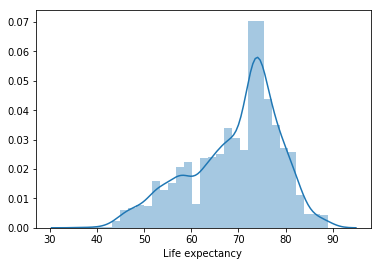

In [14]:
sns.distplot(df['Life expectancy '],kde=True)

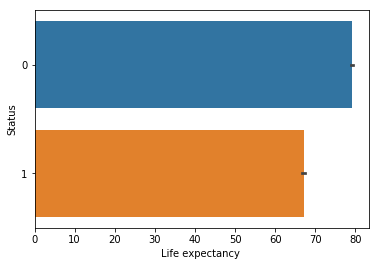

In [15]:
sns.barplot(data=df, x='Life expectancy ',y='Status',orient = 'h')

Developed nations have high life expectancy than Developing nations

In [16]:
disease_cols=df[['Life expectancy ','Alcohol','Hepatitis B','Measles ',' BMI ','Polio','Diphtheria ',' HIV/AIDS']]


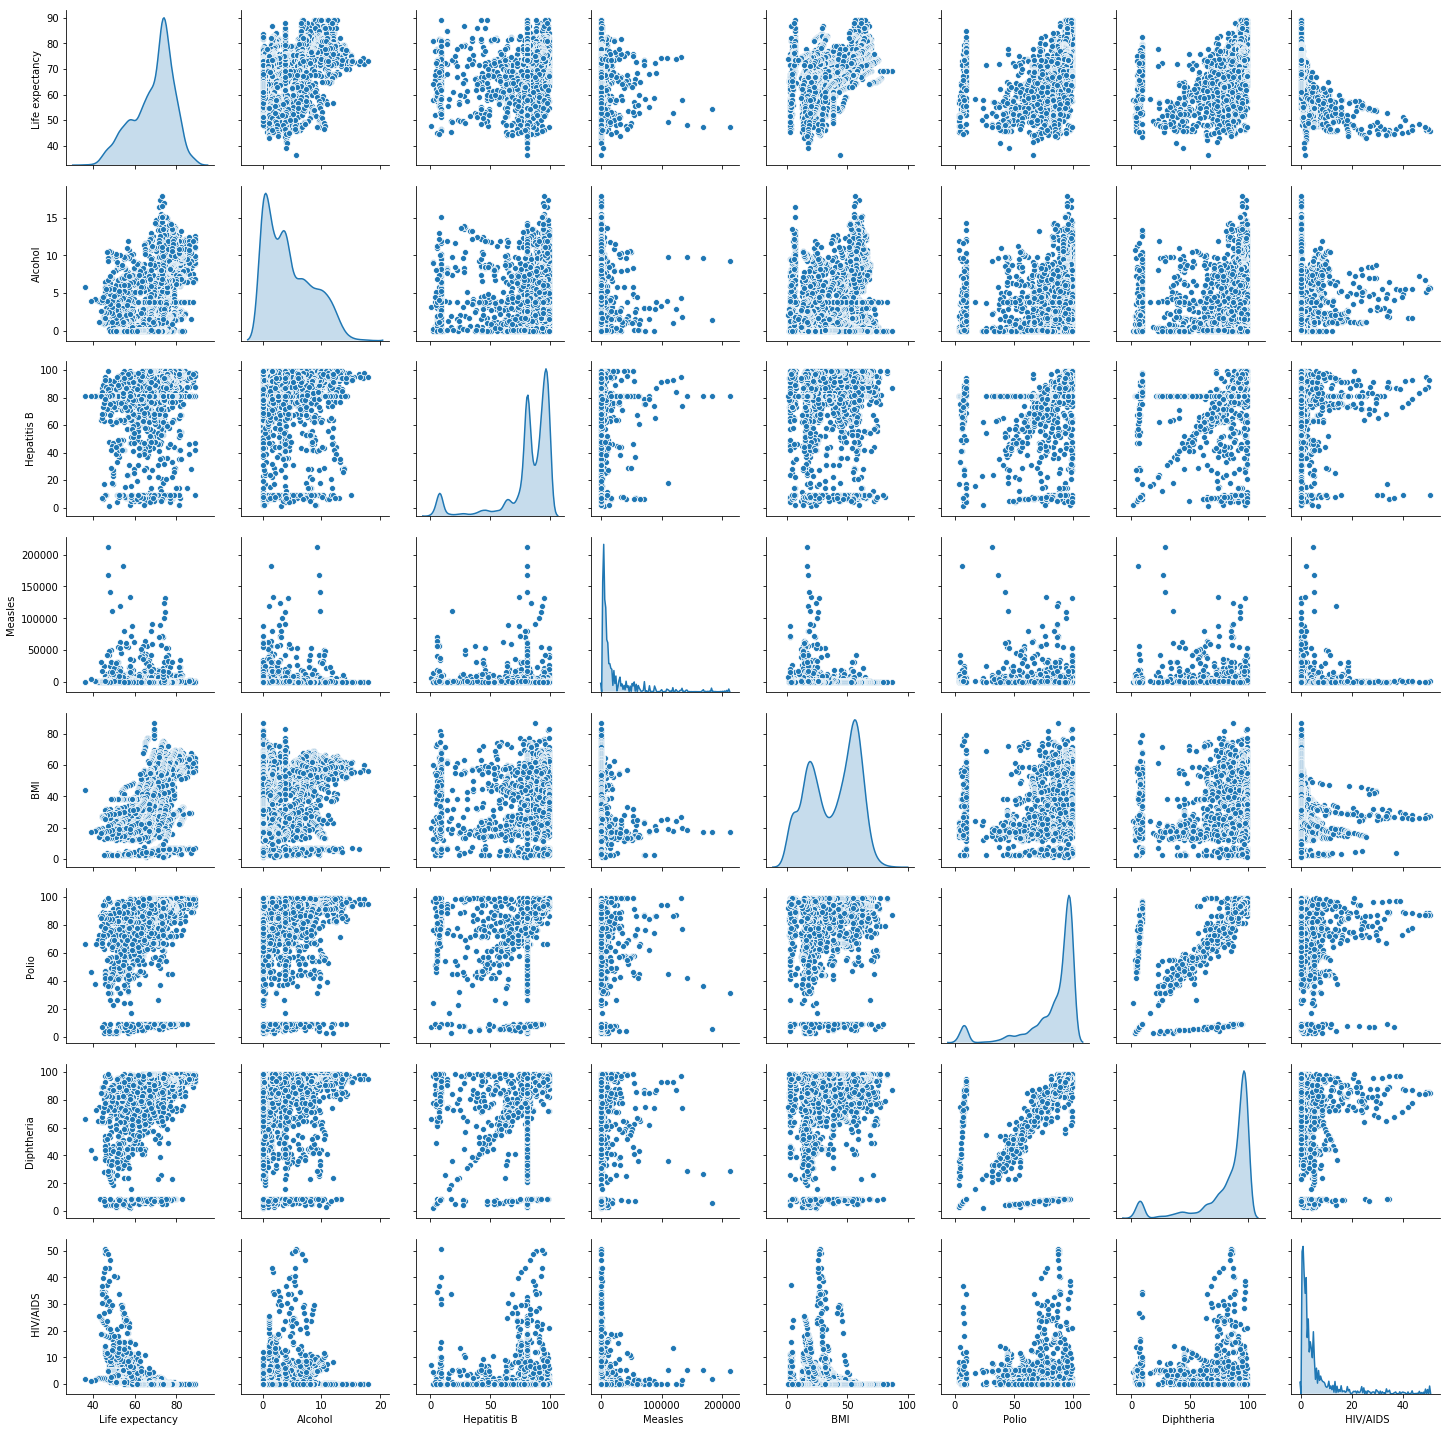

In [17]:
sns.pairplot(disease_cols,diag_kind='kde')

In [18]:
# Measles, BMI, Diphtheria, HIV/AIDS are highly correlated to Life expectancy , aslo evident from the pairplot.
# Polio - Diphtheria, Hepatitis B - Diphtheria are highly correlated, hence multi collinearity is present.


disease_cols.corr()

,Life expectancy,Alcohol,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS
Life expectancy,1.000000,0.389847,0.203771,-0.157574,0.559255,0.461574,0.475418,-0.556457
Alcohol,0.389847,1.000000,0.074530,-0.049752,0.314697,0.213446,0.214106,-0.046235
Hepatitis B,0.203771,0.074530,1.000000,-0.090317,0.134929,0.408519,0.499958,-0.102405
Measles,-0.157574,-0.049752,-0.090317,1.000000,-0.175925,-0.136146,-0.141861,0.030899
BMI,0.559255,0.314697,0.134929,-0.175925,1.000000,0.282156,0.281059,-0.243548
Polio,0.461574,0.213446,0.408519,-0.136146,0.282156,1.000000,0.673553,-0.159489
Diphtheria,0.475418,0.214106,0.499958,-0.141861,0.281059,0.673553,1.000000,-0.164787
HIV/AIDS,-0.556457,-0.046235,-0.102405,0.030899,-0.243548,-0.159489,-0.164787,1.000000


In [19]:
measures_cols=df[['Life expectancy ','Adult Mortality','infant deaths','under-five deaths ',' thinness  1-19 years',' thinness 5-9 years','Schooling']]

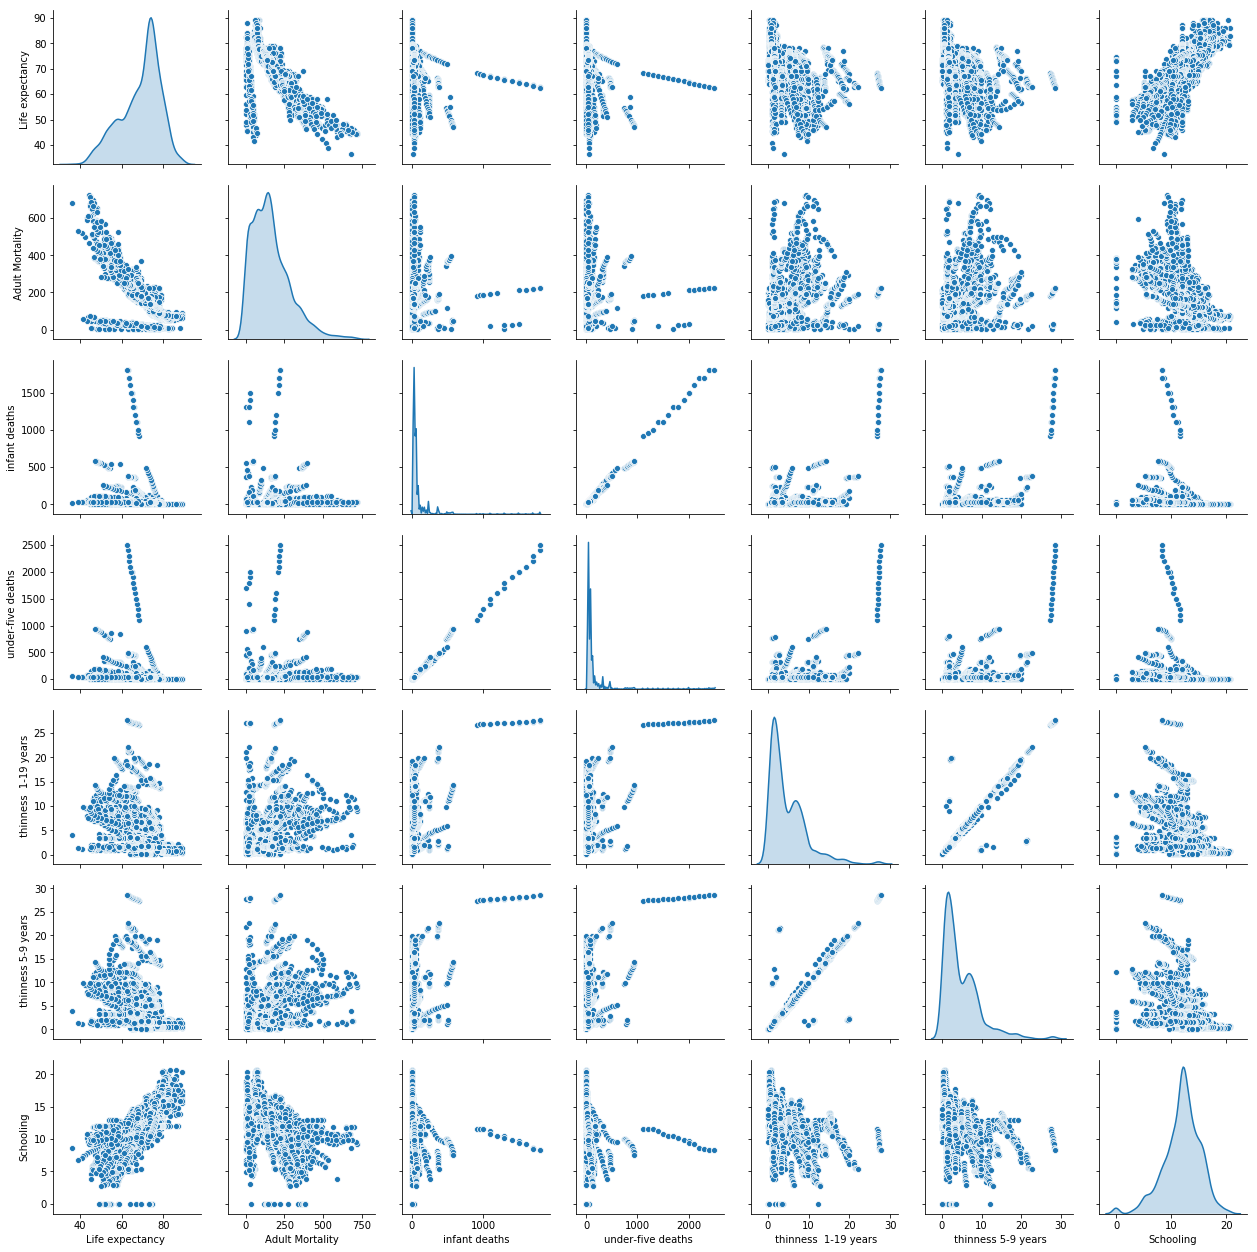

In [20]:
sns.pairplot(measures_cols,diag_kind='kde')

In [21]:
# Adult Mortality,infant deaths,under-five deaths,thinness 1-19 years,thinness 5-9 years and Schooling are highly correlated to target variable
# thus all are significant features to predict target variable.
# All independent features are highly correlated with each other.

measures_cols.corr()

,Life expectancy,Adult Mortality,infant deaths,under-five deaths,thinness 1-19 years,thinness 5-9 years,Schooling
Life expectancy,1.000000,-0.696326,-0.196535,-0.222503,-0.467267,-0.461739,0.715066
Adult Mortality,-0.696326,1.000000,0.078890,0.094280,0.296135,0.301634,-0.434756
infant deaths,-0.196535,0.078890,1.000000,0.996629,0.464811,0.470445,-0.191757
under-five deaths,-0.222503,0.094280,0.996629,1.000000,0.466697,0.471167,-0.207111
thinness 1-19 years,-0.467267,0.296135,0.464811,0.466697,1.000000,0.939187,-0.436545
thinness 5-9 years,-0.461739,0.301634,0.470445,0.471167,0.939187,1.000000,-0.426192
Schooling,0.715066,-0.434756,-0.191757,-0.207111,-0.436545,-0.426192,1.000000


In [22]:
income_exp_cols=df[['Life expectancy ','percentage expenditure','Total expenditure','GDP','Population','Income composition of resources']]

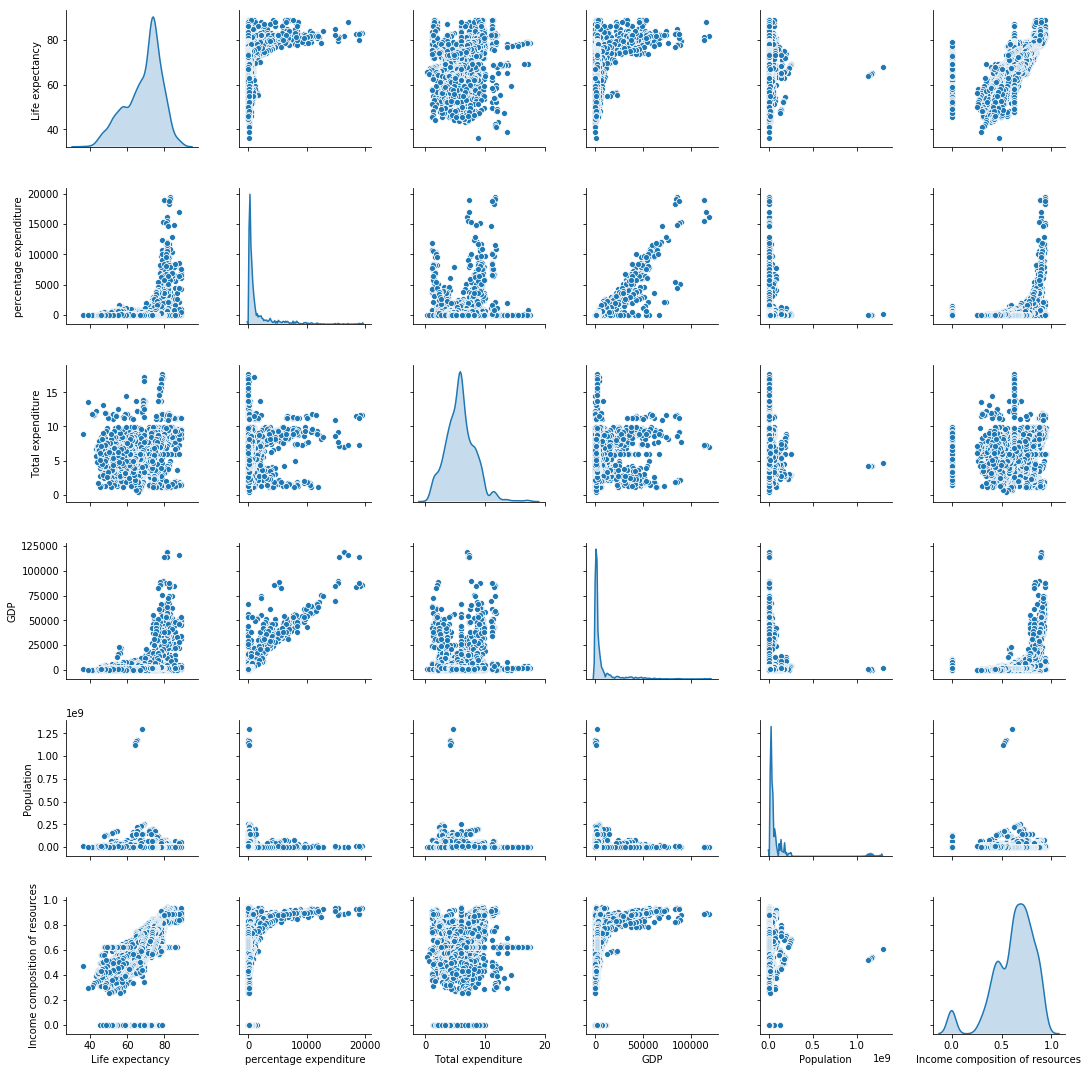

In [23]:
sns.pairplot(income_exp_cols, diag_kind='kde')


In [24]:
# percentage expenditure, GDP, Income composition of resources are highly correlated to Life expectancy.
# percentage expenditure and GDP are highly correlated as percentage expenditure is Expenditure on health as a percentage of Gross Domestic Product per capita(%).

income_exp_cols.corr()

,Life expectancy,percentage expenditure,Total expenditure,GDP,Population,Income composition of resources
Life expectancy,1.000000,0.381791,0.207981,0.430895,-0.028845,0.692483
percentage expenditure,0.381791,1.000000,0.173414,0.901819,-0.016888,0.380374
Total expenditure,0.207981,0.173414,1.000000,0.111600,-0.061882,0.149095
GDP,0.430895,0.901819,0.111600,1.000000,-0.025269,0.441657
Population,-0.028845,-0.016888,-0.061882,-0.025269,1.000000,-0.015014
Income composition of resources,0.692483,0.380374,0.149095,0.441657,-0.015014,1.000000


In [27]:
X=df.drop('Life expectancy ',axis=1)
Y=df['Life expectancy ']

## Train test split

In [28]:
from sklearn.model_selection import train_test_split


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

## creating and training the model


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regr = LinearRegression()


In [34]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model evaluation 

In [35]:
# print the intercept
print(regr.intercept_)

66.75713176492289


In [36]:
coeff_df = pd.DataFrame(regr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Year,-5.147183e-03
Status,-1.607929e+00
Adult Mortality,-1.956995e-02
infant deaths,9.405989e-02
Alcohol,5.999808e-02
percentage expenditure,-1.270702e-05
Hepatitis B,-1.542019e-02
Measles,-2.753822e-05
BMI,4.593582e-02
under-five deaths,-7.046948e-02


## predictions of the model

In [37]:
predictions = regr.predict(X_test)

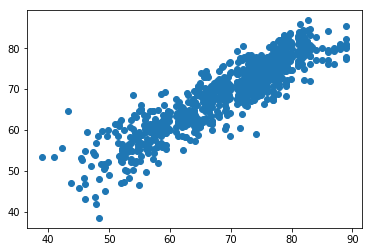

In [38]:
plt.scatter(Y_test,predictions)
plt.show()

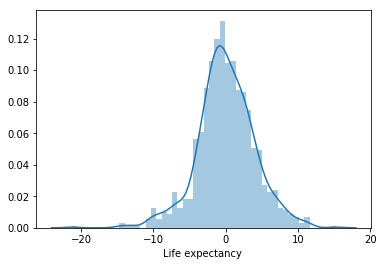

In [39]:
sns.distplot((Y_test-predictions),bins=50);

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Intercept: ',regr.intercept_)
print('Mean absolute error for test: ',mean_absolute_error(Y_test,predictions))
print('Mean Squared error for test: ',mean_squared_error(Y_test,predictions))
print('Root mean squared error for test: ',np.sqrt(mean_squared_error(Y_test,predictions)))
print('Accuracy for train: ',regr.score(X_train, Y_train))
print('Accuracy for test: ',regr.score(X_test, Y_test))


Intercept:  66.75713176492289
Mean absolute error for test:  2.9937654601596524
Mean Squared error for test:  15.815326322021962
Root mean squared error for test:  3.976848792954286
Accuracy for train:  0.81859159827165
Accuracy for test:  0.8196370908049757


In [41]:
X_test.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [42]:
X_test

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
867,2014,1,122.0,0,0.010,2700.073050,93.000000,0,59.4,0,93.0,6.38000,93.0,0.1,19941.455320,1314545.0,1.9,1.9,0.860000,16.500000
1780,2015,1,199.0,39,3.755,0.000000,89.000000,6,23.8,50,89.0,5.93819,89.0,0.3,1194.591370,5243669.0,12.8,13.0,0.552000,9.100000
621,2002,1,424.0,9,2.550,0.000000,80.940461,2788,2.3,14,41.0,2.45000,41.0,7.2,1766.947595,1386542.0,9.3,8.9,0.488000,9.500000
2715,2014,1,38.0,68,0.010,14.167702,78.000000,314,18.1,97,82.0,7.22000,78.0,3.2,719.172669,38833338.0,5.7,5.6,0.483000,10.000000
2717,2012,1,339.0,73,0.010,92.886979,78.000000,2027,17.2,109,82.0,7.58000,78.0,4.6,647.747410,3636796.0,5.8,5.8,0.477000,10.000000
2855,2002,1,176.0,0,1.240,171.137361,66.000000,101,42.6,0,67.0,3.52000,7.0,0.1,1353.934819,193956.0,1.7,1.6,0.000000,10.200000
1410,2015,1,166.0,3,3.755,0.000000,97.000000,17779,44.9,3,97.0,5.93819,97.0,0.1,1766.947595,1386542.0,3.3,3.4,0.662000,13.000000
933,2012,1,83.0,3,11.500,751.379355,78.000000,0,61.1,3,99.0,11.44000,99.0,0.1,4838.244400,6565979.0,0.6,0.6,0.885000,16.100000
2572,2012,1,154.0,9,6.560,801.050465,98.000000,5197,3.1,11,99.0,4.17000,99.0,0.1,5859.915622,67843979.0,8.0,8.1,0.729000,13.700000
1376,2001,1,434.0,77,1.630,3.847603,80.940461,11304,14.7,120,77.0,4.62000,8.0,16.9,41.776361,32321482.0,9.0,9.0,0.447000,8.400000


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
rf_regressor.fit(X_train,Y_train)

print(rf_regressor.score(X_test, Y_test))

0.956944151642288


In [46]:
def prediction(Year, Status, Adult_Mortality, infant_deaths, Alcohol,
       percentage_expenditure, Hepatitis_B, Measles ,  BMI ,
       under_five_deaths , Polio, Total_expenditure, Diphtheria ,
       HIV, GDP, Population, thinness_1_19_years,
       thinness_5_9_years, Income_composition_of_resources, Schooling):
  d=np.zeros(len(X_test.columns))
  d[0]=Year
  d[1]=Status
  d[2]=Adult_Mortality
  d[3]=infant_deaths
  d[4]=Alcohol
  d[5]=percentage_expenditure
  d[6]=Hepatitis_B
  d[7]=Measles
  d[8]=BMI
  d[9]=under_five_deaths
  d[10]=Polio
  d[11]=Total_expenditure
  d[12]=Diphtheria
  d[13]=HIV
  d[14]=GDP
  d[15]=Population
  d[16]=thinness_1_19_years
  d[17]=thinness_5_9_years
  d[18]=Income_composition_of_resources
  d[19]=Schooling

  return rf_regressor.predict([d])[0]
  

In [47]:
prediction(2000,	1	,	665.0,	24,	1.68	,0.000000,	79.0,	1483,	25.5	,39,	78.0,	7.10,	78.0	,43.5	,547.358879	,12222251.0,	11.0,	11.2,	0.434	,9.8)

45.67999999999997

In [48]:
!pip install watson-machine-learning-client

In [49]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-01 14:24:08,275 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [51]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [52]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Diksha", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "guptadiksha534@gmail.com", 
               client.repository.ModelMetaNames.NAME: "life expectancy project"}

In [53]:
model_artifact =client.repository.store_model(regr, meta_props=model_props)

In [54]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [55]:
published_model_uid

'fe462957-7bef-4f13-95cf-ea145b9d93d8'

In [56]:
deployment = client.deployments.create(published_model_uid, name="life expectancy project")



#######################################################################################

Synchronous deployment creation for uid: 'fe462957-7bef-4f13-95cf-ea145b9d93d8' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='447fd2ba-6267-4aee-a8ea-2479c06be6d2'
------------------------------------------------------------------------------------------------




In [57]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)